# Fluid Resistance and Terminal speed
Using Python's symbolic computation library, we will see how resistive forces affect motion.

In Lecture 3 of our Dynamics component of MAT201, we explored ideas of changing the balance of forces acting upon an object, particularly in the case where a resistive force is applied proportional to the velocity of the object. 

We'll explore some of the same ideas and use Python to solve these equations for us.

Let's go ahead and load in the libraries we need: in this case, we'll need *numpy*, *sympy* and some plotting routines for later:

In [1]:
%matplotlib inline
import sympy as sym
import numpy as np
import math 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from sympy.utilities.lambdify import lambdify, implemented_function

## Resistive forces

We have already considered general cases where an object may be subject to a single resistive force. To recap, we saw that an object subject to a resistive force $R(v)$ would therefore be subject to Newton's Second Law as:

$$
 m\frac{{\rm d}v}{{\rm d}t}=-R(v),
$$

which can be separated and integrated to determine expresions for elapsed time $t$ as 

$$
t=-m\int_{v_0}^{v}\frac{{\rm d}v}{R(v)},
$$

or indeed an expression for the object displacement $s$ as

$$
s=s_0+\int_{t=0}^{t=t}v{\rm d}t.
$$

But what happens if multiple forces act upon the body? A good example of this is projectile motion, where an object is accelerating (due to gravity), but is also subject to a resistive force.


## Projectile Motion

In the case where an object is acted upon by several forces, some of which may vary according to variables like velocity, we must consider the *sum* of forces acting on the body, in order to use Newton's Second Law to describe the motion, e.g.

$$
\sum{F}=mg-R(v)=ma.
$$

Note that the signs associated with each force are incredibly important. 

The direction and magnitude of forces acting upon a body may confusingly change with time: consider a ball thrown directly upwards, which during *ascent* will have air resistance acting in the same direction as gravity, at its maximum height will be motionless (and hence no air resistance), and upon *descent* will have air resistance acting to counter gravity. We may have to break up our treatment of the dynamics of objects into different stages depending on the forces and how they act over time. 

In the lectures we saw a general case described for a mass released from rest from a cliff. This object goes on to achieve terminal velocity before impact. We'll repeat that general case to examine the behaviour of the solution.

In that example, an object was released from rest, and was subject to a resistive force $-kv$ and the force of gravity. We first use Newton's Law to determine the acceleration of the object as a function of the object's velocity:


In [2]:
v = sym.Symbol('v',real=True)
x = sym.Symbol('x',real=True)
t = sym.Symbol('t',real=True, positive=True)
m = sym.Symbol('m',real=True, positive=True)
k = sym.Symbol('k',real=True, positive=True)
D = sym.Symbol('D',real=True, positive=True)
g = 9.81
v_ini = 0
F_res = -k * v
F_g = m*g
F_total = F_res + F_g
a = F_total/m
print("a=",a)

a= (-k*v + 9.81*m)/m


Over time the resistance force will grow with the velocity of the object, until it *matches* the force created by gravity. These forces will then cancel each other, yielding *no net acceleration*. The velocity at which this occurs is called the **terminal velocity**. To calculate the terminal velocity, we set acceleration $a=0$ and solve for the velocity:

In [3]:
v_terminal = sym.solve(F_total/m, v)
print(v_terminal)

[9.81*m/k]


As expected, this is the value is identical to the expression we determined in the lectures.

To obtain the acceleration, velocity and position of the object over time, we have to separate and integrate Newton's Second Law. To emphasise that this is a separable equation, we collect all the terms involving velocity on one side of the equation (RHS), and keep some of the constants on the other (LHS):
(NB: This may take a few seconds!)

In [4]:
lhs = sym.integrate(1/m,(t, 0, t))
print("lhs: ",lhs)
rhs = sym.integrate(1.0 / F_total,(v, 0, v))
print("rhs: ",rhs)
vofx = sym.solve(rhs - lhs, v)
print("v(x):",vofx[0])

lhs:  t/m
rhs:  1.0*log(-9.81*m)/k - 1.0*log(1.0*k*v - 9.81*m)/k


v(x): 9.81*m*(1.0 - exp(-k*t/m))/k


Having integrated each side separately, we can move one result over to the other side and ask Python to solve the equation "RHS-LHS=0", to determine velocity as a function of time:

In [5]:
voft = sym.solve(rhs - lhs, v)
print("v(t):",voft)

v(t): [9.81*m*(1.0 - exp(-k*t/m))/k]


Once again this matches the velocity we found in the lectures. But what does this actually represent?

Lets plot this on a graph, and include the solution to the same equations but **only** including the force of gravity. In the lectures, we did this using a Taylor series expansion, but we can let Python resolve the same set of equations but including only $F_g$. In order to visualise this, we'll assume a mass $m=2{\rm{kg}}$ and $k=1$:



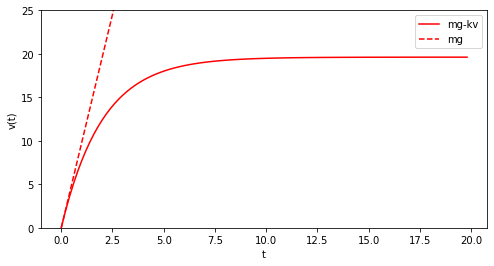

In [6]:
func = lambdify(t, voft[0].subs({m: 2, k:1}),'numpy')
lhs2 = sym.integrate(1/m,(t, 0, t))
rhs2 = sym.integrate(1.0 / F_g,(v, 0, v))
voft2 = sym.solve(rhs2 - lhs2, v)
func2 = lambdify(t, voft2[0].subs({m: 2}),'numpy')
xvals = np.arange(0,20,.2)
yvals = func(xvals)
yvals2 = func2(xvals)

# make figure
fig2 = plt.figure(figsize=(8,4))
plt.plot(xvals,yvals,'r',label='mg-kv')
plt.plot(xvals,yvals2,'r--',label='mg')
plt.ylim([0, 25])
plt.xlabel("t")
plt.ylabel("v(t)")
plt.legend(loc='best')
plt.show()

In the graph, you can see that both velocities initially grow in exactly the same way, but the red curve begins to decelerate after a short time. Air resistance quickly forces the object to slow and have a constant velocity: the resistive force **matches** the force due to gravity, meaning that there is no acceleration.

We can also examine the acceleration as a function of time both with and without the resistive force. To do this, we differentiate our velocity result:

a(t): 9.81*exp(-k*t/m)


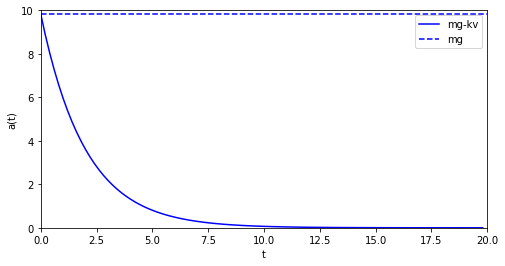

In [7]:
aoft = sym.diff(voft[0],t)
print("a(t):", aoft)
aoft2 = sym.diff(voft2[0],t)
func3 = lambdify(t, aoft.subs({m: 2, k:1}),'numpy')
ayvals = func3(xvals)

# make figure
fig3 = plt.figure(figsize=(8,4))
plt.plot(xvals,ayvals,'b',label='mg-kv')
plt.plot([0,20],[aoft2,aoft2],'b--',label='mg')
plt.ylim([0, 10])
plt.xlim([0,20])
plt.xlabel("t")
plt.ylabel("a(t)")
plt.legend(loc='best')
plt.show()

We can see again that, initially the object accelerates at a value of $g=9.81{\rm{ms}}^{-2}$, but air resistance causes the acceleration to fall to zero, at which point terminal velocity is achieved.

s(t): 9.81*m*t/k - 9.81*m**2/k**2 + 9.81*m**2*exp(-k*t/m)/k**2


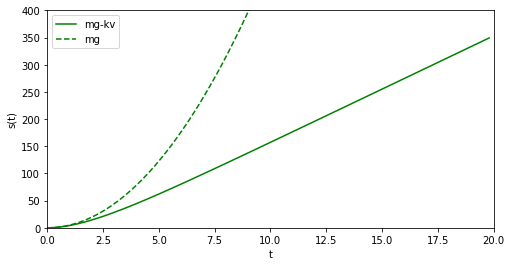

In [8]:
soft = sym.integrate(voft[0],(t, 0, t))
print("s(t):", sym.simplify(soft))
soft2 = sym.integrate(voft2[0],(t, 0, t))
func4 = lambdify(t, soft.subs({m: 2, k:1}),'numpy')
func5 = lambdify(t, soft2.subs({m: 2, k:1}),'numpy')
syvals = func4(xvals)
syvals2 = func5(xvals)

# make figure
fig3 = plt.figure(figsize=(8,4))
plt.plot(xvals,syvals,'g',label='mg-kv')
plt.plot(xvals,syvals2,'g--',label='mg')
plt.ylim([0, 400])
plt.xlim([0,20])
plt.xlabel("t")
plt.ylabel("s(t)")
plt.legend(loc='best')
plt.show()

Once more we obtain the expressions and graph found in the lectures. In this case, the displacement will grow over time faster in the case where there is no resistive force, as expected. In the case with resistance, the trend levels off: this is to be expected (if the acceleration is zero, the velocity is constant, we should expect distance to linearly depend on time).

## Over To You

This worksheet illustrates how to use symbolic Python to illustrate solutions of Newton's Second Law, for objects subject to both constant acceleration and a resistive force which depends on the velocity.


Try this for yourself: 


1.   Change some of the constants in the problem: what happens when the mass is doubled or when the initial velocity is not zero? How do these constants affect the behaviour
2.   The resistive force changes if the speed of the object is particularly high. In the lectures, we categorised these resistive forces as 

$$
f = Dv^2,
$$

for a different proportionality constant $D$. Change the form of the force from the low speed $-kv$ to the high speed $-Dv^2$ form in this notebook, and see if you can establish how objects behave in this second regime.
3.   Attempt a few of the related tutorial questions, and see if you can confirm your worked solutions using the approaches demonstrated in this notebook.
